Library and Directory Setup

In [1]:
options(warn=-1)

In [2]:
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(plotly))
suppressPackageStartupMessages(library(VennDiagram))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(Cairo))
suppressPackageStartupMessages(library(wesanderson))
suppressPackageStartupMessages(library(ggridges))

In [3]:
setwd("F:/Thesis/Working_Data/Final")
getwd()

[1] "F:/Thesis/Working_Data/Final"

# 0) Input

In [4]:
Industrial_Patent_Dataset <- fread("Industrial_Patent_Dataset.csv", stringsAsFactors = FALSE, na.strings="")
dim(Industrial_Patent_Dataset)
sapply(Industrial_Patent_Dataset,class)

[1] 19602    54

Patent_number                        Application_Date 
                            "character"                             "character" 
                             Clean_name                    APPLICANT_MATCH_NAME 
                            "character"                             "character" 
                      PDL_ORIGINAL_NAME                          PDL_MATCH_NAME 
                            "character"                             "character" 
                                 METHOD                        Person_ctry_code 
                            "character"                             "character" 
                                COUNTRY                          Applicant_Type 
                            "character"                             "character" 
                           YEAR_FOUNDED                              SIZE_RANGE 
                              "integer"                             "character" 
                               INDUSTRY                               GPT_Scope 
                            "character"                             "character" 
                                   Year                           Applicant_Age 
                              "integer"                               "integer" 
                            Agriculture                     Arts and Humanities 
                              "integer"                               "integer" 
                    Banking and Finance                                Business 
                              "integer"                               "integer" 
                            Cartography                         Computer Vision 
                              "integer"                               "integer" 
                Computing in Government                         Control Methods 
                              "integer"                               "integer" 
    Distributed Artificial Intelligence Document Management and Text Processing 
                              "integer"                               "integer" 
                              Education                       Energy Management 
                              "integer"                               "integer" 
                          Entertainment                             Fuzzy Logic 
                              "integer"                               "integer" 
 Knowledge Representation And Reasoning      Law Social and Behavioral Sciences 
                              "integer"                               "integer" 
              Life and Medical Sciences                       Logic Programming 
                              "integer"                               "integer" 
                       Machine Learning                                Military 
                              "integer"                               "integer" 
            Natural Language Processing                                Networks 
                              "integer"                               "integer" 
                   Ontology Engineering       Personal Devices Computing and Hc 
                              "integer"                               "integer" 
      Physical Sciences and Engineering                 Planning and Scheduling 
                              "integer"                               "integer" 
                   Predictive Analytics                 Probabilistic Reasoning 
                              "integer"                               "integer" 
                             Publishing                                Robotics 
                              "integer"                               "integer" 
                         Search Methods                                Security 
                              "integer"                               "integer" 
                      Speech Processing                      Telecommunications 
                              "integer"                  

Join features into groups

In [5]:
Features <- colnames(Industrial_Patent_Dataset)
General_Features <- Features[1:16]
Category_Features <- Features[(length(Features)-2):(length(Features))]
Field_Features <- Features[17:(length(Features)-3)]

General_Features
Category_Features
Field_Features

[1] "Patent_number"        "Application_Date"     "Clean_name"          
 [4] "APPLICANT_MATCH_NAME" "PDL_ORIGINAL_NAME"    "PDL_MATCH_NAME"      
 [7] "METHOD"               "Person_ctry_code"     "COUNTRY"             
[10] "Applicant_Type"       "YEAR_FOUNDED"         "SIZE_RANGE"          
[13] "INDUSTRY"             "GPT_Scope"            "Year"                
[16] "Applicant_Age"

[1] "Field_Applications"      "Functional_Applications"
[3] "Techniques"

[1] "Agriculture"                            
 [2] "Arts and Humanities"                    
 [3] "Banking and Finance"                    
 [4] "Business"                               
 [5] "Cartography"                            
 [6] "Computer Vision"                        
 [7] "Computing in Government"                
 [8] "Control Methods"                        
 [9] "Distributed Artificial Intelligence"    
[10] "Document Management and Text Processing"
[11] "Education"                              
[12] "Energy Management"                      
[13] "Entertainment"                          
[14] "Fuzzy Logic"                            
[15] "Knowledge Representation And Reasoning" 
[16] "Law Social and Behavioral Sciences"     
[17] "Life and Medical Sciences"              
[18] "Logic Programming"                      
[19] "Machine Learning"                       
[20] "Military"                               
[21] "Natural Language Processing"            
[22] "Networks"                               
[23] "Ontology Engineering"                   
[24] "Personal Devices Computing and Hc"      
[25] "Physical Sciences and Engineering"      
[26] "Planning and Scheduling"                
[27] "Predictive Analytics"                   
[28] "Probabilistic Reasoning"                
[29] "Publishing"                             
[30] "Robotics"                               
[31] "Search Methods"                         
[32] "Security"                               
[33] "Speech Processing"                      
[34] "Telecommunications"                     
[35] "Transportation"

# 1) Development and Diffusion Path and Knowledge Concentration

## 1.1) GPT Market Cluster Evolution Over Time

Evolution over time of Applied AI and Core AI patent applications

In [6]:
GPT_ByYear <- unique(Industrial_Patent_Dataset, by=c("Patent_number"))
GPT_ByYear <- GPT_ByYear[, .N, by = c("Year", "GPT_Scope")]
colnames(GPT_ByYear)[3] <- "Number_Patents"
GPT_ByYear <- GPT_ByYear[order(GPT_ByYear[,Year])]
head(GPT_ByYear,10)

Year,GPT_Scope,Number_Patents
1978,Applied_AI,1
1981,Applied_AI,1
1982,Applied_AI,6
1983,Applied_AI,3
1984,Applied_AI,10
1985,Applied_AI,10
1985,Core_AI,1
1986,Applied_AI,12
1987,Applied_AI,13
1988,Applied_AI,34


In [7]:
#Consistency Check
sum(GPT_ByYear[GPT_Scope=="Applied_AI",Number_Patents])
sum(GPT_ByYear[GPT_Scope=="Core_AI",Number_Patents])
sum(GPT_ByYear[,Number_Patents])

[1] 16184

[1] 787

[1] 16971

Distribution Statistics

In [8]:
summary(GPT_ByYear[GPT_Scope=="Core_AI",Year])
summary(GPT_ByYear[GPT_Scope=="Applied_AI",Year])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1985    1996    2003    2003    2010    2018 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1978    1990    1999    1999    2008    2018 

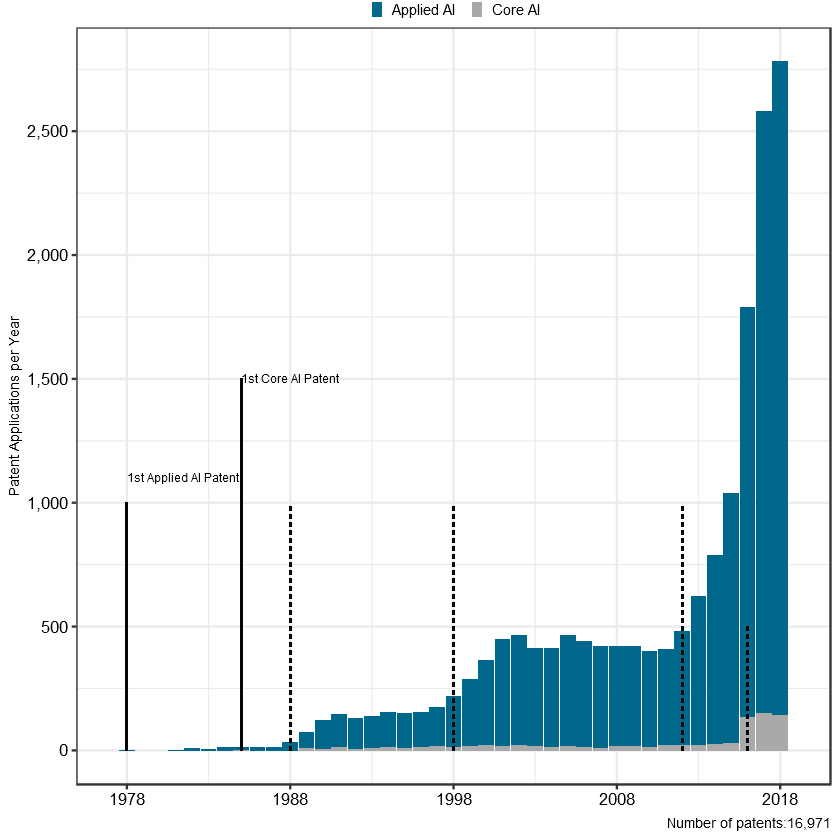

In [28]:
GPT_Scope_Trend <- ggplot(GPT_ByYear, aes(x = Year, y = Number_Patents,fill=GPT_Scope)) + 
      labs(caption="Number of patents:16,971") +
      geom_bar(stat="identity") +    
      scale_fill_manual(values=c("deepskyblue4", "darkgrey"), name = "GPT Scope", labels = c("Applied AI", "Core AI")) +
      geom_segment(aes(x = 1978, y = 0, xend = 1978, yend = 1000), color = "black", size=0.25) + 
      geom_segment(aes(x = 1985, y = 0, xend = 1985, yend = 1500), color = "black", size=0.25) + 
      geom_segment(aes(x = 1988, y = 0, xend = 1988, yend = 1000), color = "black", size=0.5, linetype="dashed") +
      geom_segment(aes(x = 1998, y = 0, xend = 1998, yend = 1000), color = "black", size=0.5, linetype="dashed") +
      geom_segment(aes(x = 2012, y = 0, xend = 2012, yend = 1000), color = "black", size=0.5, linetype="dashed") +
      geom_segment(aes(x = 2016, y = 0, xend = 2016, yend = 500), color = "black", size=0.5, linetype="dashed") +
      scale_x_continuous(name=NULL, limits = c(1977,2019), breaks=seq(1978,2019,10)) + 
      scale_y_continuous(name="Patent Applications per Year", breaks = seq(0,3000,500),
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE)) +
      theme_bw() +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=10, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=10, color="black")) +
      theme(axis.title.y=element_text(size=8)) +
      theme(legend.position = "top",legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-5,-5,-5,-5),legend.key.size=unit("0.25","cm")) +
      annotate(geom="text", x=1978, y=1100, label="1st Applied AI Patent",
               color="black", size=2.5,family="sans", hjust="left") +
      annotate(geom="text", x=1985, y=1500, label="1st Core AI Patent",
               color="black", size=2.5, family="sans", hjust="left")
GPT_Scope_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine.
ggsave(plot=GPT_Scope_Trend,
       filename="GPT_Scope_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_I",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 1.2) Application Sector Distribution Overtime

In [12]:
GPT_ByYear_AS <- Industrial_Patent_Dataset[GPT_Scope=="Applied_AI"]
GPT_ByYear_AS <- unique(GPT_ByYear_AS, by=c("Patent_number"))

#Consistency Check
nrow(GPT_ByYear_AS)

[1] 16184

Count the number of patent applications per Field Application per Year

In [13]:
Field_Applications <- c("Agriculture","Arts and Humanities","Banking and Finance","Business","Cartography",
                        "Computing in Government","Document Management and Text Processing","Education",
                        "Energy Management","Entertainment","Law Social and Behavioral Sciences",
                        "Life and Medical Sciences", "Military","Networks","Personal Devices Computing and Hc",
                        "Physical Sciences and Engineering","Publishing","Security","Telecommunications",
                        "Transportation")

In [14]:
GPT_ByYear_AS <- data.table(GPT_ByYear_AS[, by = Year,
                                          lapply(.SD, sum),
                                          .SDcols = as.character(Field_Applications)])
head(GPT_ByYear_AS)

Year,Agriculture,Arts and Humanities,Banking and Finance,Business,Cartography,Computing in Government,Document Management and Text Processing,Education,Energy Management,...,Law Social and Behavioral Sciences,Life and Medical Sciences,Military,Networks,Personal Devices Computing and Hc,Physical Sciences and Engineering,Publishing,Security,Telecommunications,Transportation
1978,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1981,0,1,1,1,0,1,1,0,0,...,0,1,0,0,1,1,0,0,0,0
1982,0,0,1,1,0,0,0,0,0,...,0,3,0,0,1,3,0,3,0,1
1983,0,1,0,0,0,0,1,0,0,...,0,3,0,0,2,0,1,0,0,2
1984,0,0,1,0,0,0,0,0,0,...,2,6,0,0,5,4,0,5,2,2
1985,0,2,2,0,0,2,0,1,0,...,1,5,0,0,5,5,6,3,0,4


In [15]:
#Adjust table format for graph
GPT_ByYear_AS <- melt(GPT_ByYear_AS, 
                            id.vars = "Year",
                            measure.vars = as.character(Field_Applications),
                            variable.name = "Field",
                            value.name = "Total_AS_Patents")
head(GPT_ByYear_AS,20)

Year,Field,Total_AS_Patents
1978,Agriculture,0
1981,Agriculture,0
1982,Agriculture,0
1983,Agriculture,0
1984,Agriculture,0
1985,Agriculture,0
1986,Agriculture,1
1987,Agriculture,1
1988,Agriculture,1
1989,Agriculture,0


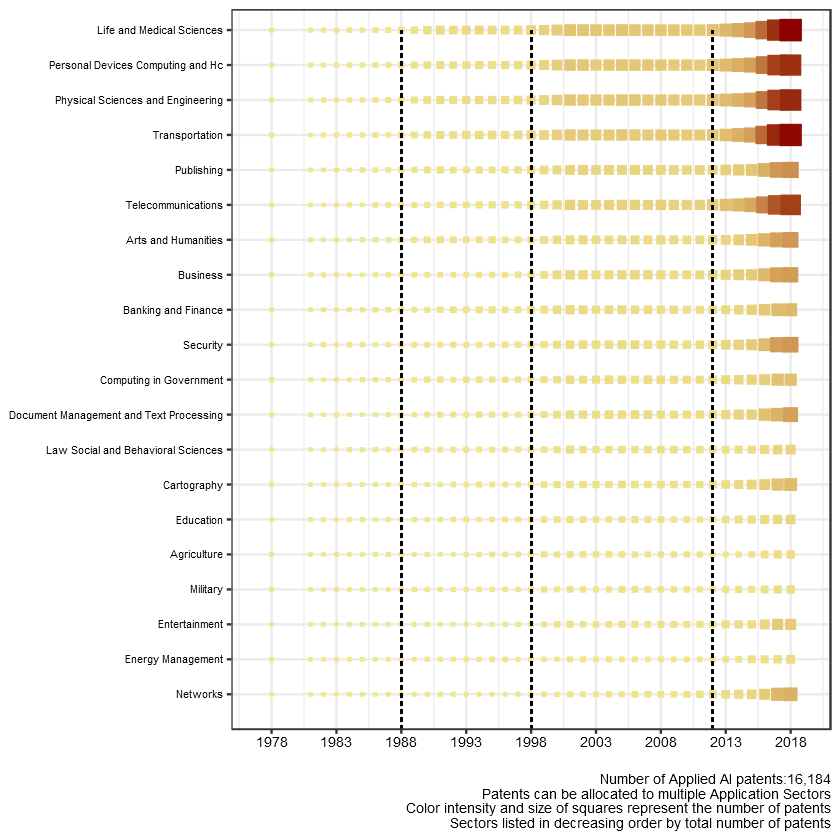

In [29]:
GPT_ByYear_AS_Chart <- GPT_ByYear_AS %>%
      mutate(Field=fct_reorder(Field,Total_AS_Patents)) %>%
      ggplot(aes(x= Year, y=Field)) +
      labs(caption="\nNumber of Applied AI patents:16,184\nPatents can be allocated to multiple Application Sectors\nColor intensity and size of squares represent the number of patents\nSectors listed in decreasing order by total number of patents") +
      geom_point(aes(colour=Total_AS_Patents, size=Total_AS_Patents), shape=15) +
      geom_segment(aes(x=1988, xend=1988, y=0, yend=20), color = "black", size=0.25, linetype="dashed") +
      geom_segment(aes(x=1998, xend=1998, y=0, yend=20), color = "black", size=0.25, linetype="dashed") +
      geom_segment(aes(x=2012, xend=2012, y=0, yend=20), color = "black", size=0.25, linetype="dashed") +
      scale_x_continuous(name=NULL,limits = c(1977,2019), breaks=seq(1978,2018,5)) +
      scale_y_discrete(name=NULL) + 
      theme_bw() +
      theme(legend.position = "none",legend.title=element_blank()) + 
      theme( plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=6, color="black")) +
      scale_color_gradient(low="khaki", high="darkred")
GPT_ByYear_AS_Chart

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=GPT_ByYear_AS_Chart,
       filename="GPT_ByYear_AS_Chart.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_I",
       scale=1,
       width=5,
       height=(5*0.75),
       units=c("in"),
       dpi=300)

# 2) Concentration of AI Knowledge

## 2.1) Number of Applicants per Year

Count the number of applications per applicant per year distinguishing between Applied and Core AI

In [17]:
ByDate_Applicant <- Industrial_Patent_Dataset[,.N, by=c("Year","APPLICANT_MATCH_NAME", "GPT_Scope")]
head(ByDate_Applicant,20)

Year,APPLICANT_MATCH_NAME,GPT_Scope,N
1978,SYSTRAN INSTITUT GES FUR FORSCHUNG & ENTWICKLUNG MASCHINELLER SPRACHUBERSETZUNGSSYSTEME,Applied_AI,1
1981,IBM,Applied_AI,1
1982,STEULER INDUSTRIEWERKE,Applied_AI,1
1982,UBE IND,Applied_AI,1
1983,TOSHIBA,Applied_AI,1
1982,NCR,Applied_AI,1
1982,EASTMAN KODAK,Applied_AI,2
1983,IBM,Applied_AI,1
1984,PICKER INT,Applied_AI,1
1984,RUTLAND PLASTICS,Applied_AI,1


In [18]:
#Order by Date
ByDate_Applicant <- ByDate_Applicant[order(ByDate_Applicant[,Year]),]

colnames(ByDate_Applicant)[4] <- "Number_Patents"

#Consistency Check
sum(ByDate_Applicant$Number_Patents)

head(ByDate_Applicant)

[1] 19602

Year,APPLICANT_MATCH_NAME,GPT_Scope,Number_Patents
1978,SYSTRAN INSTITUT GES FUR FORSCHUNG & ENTWICKLUNG MASCHINELLER SPRACHUBERSETZUNGSSYSTEME,Applied_AI,1
1981,IBM,Applied_AI,1
1982,STEULER INDUSTRIEWERKE,Applied_AI,1
1982,UBE IND,Applied_AI,1
1982,NCR,Applied_AI,1
1982,EASTMAN KODAK,Applied_AI,2


Summarize by year

In [19]:
ByDate_Applicant <- ByDate_Applicant[,.N, by=c("Year","GPT_Scope")]
colnames(ByDate_Applicant)[3] <- "Number_Applicants"

head(ByDate_Applicant,10)

Year,GPT_Scope,Number_Applicants
1978,Applied_AI,1
1981,Applied_AI,1
1982,Applied_AI,5
1983,Applied_AI,3
1984,Applied_AI,9
1985,Applied_AI,9
1985,Core_AI,1
1986,Applied_AI,11
1987,Applied_AI,11
1988,Applied_AI,22


In [20]:
ByDate_Applicant[Year>1988 & Year<=1998 & GPT_Scope=="Applied_AI",]

Year,GPT_Scope,Number_Applicants
1989,Applied_AI,34
1990,Applied_AI,64
1991,Applied_AI,77
1992,Applied_AI,92
1993,Applied_AI,116
1994,Applied_AI,102
1995,Applied_AI,99
1996,Applied_AI,111
1997,Applied_AI,117
1998,Applied_AI,158


In [21]:
ByDate_Applicant[Year>1998 & Year<=2012 & GPT_Scope=="Applied_AI",]

Year,GPT_Scope,Number_Applicants
1999,Applied_AI,199
2000,Applied_AI,275
2001,Applied_AI,322
2002,Applied_AI,330
2003,Applied_AI,306
2004,Applied_AI,333
2005,Applied_AI,359
2006,Applied_AI,347
2007,Applied_AI,328
2008,Applied_AI,332


In [22]:
ByDate_Applicant[Year>2012 & Year<2019 & GPT_Scope=="Applied_AI",]

Year,GPT_Scope,Number_Applicants
2013,Applied_AI,455
2014,Applied_AI,520
2015,Applied_AI,587
2016,Applied_AI,874
2017,Applied_AI,1237
2018,Applied_AI,1416


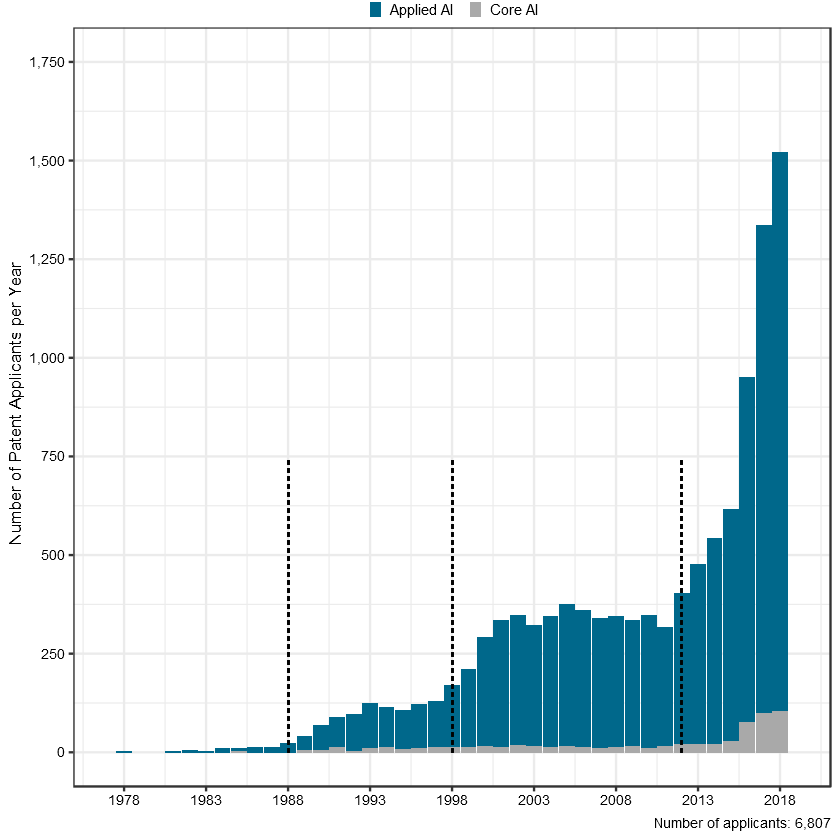

In [30]:
Applicants_per_Year<- ggplot(ByDate_Applicant, aes(x=Year, y=Number_Applicants, fill=GPT_Scope)) +
      labs(caption="Number of applicants: 6,807") +
      geom_bar(stat="identity") +
      geom_segment(aes(x=1988, xend=1988, y=0, yend=750), color = "black", size=0.25, linetype="dashed") +
      geom_segment(aes(x=1998, xend=1998, y=0, yend=750), color = "black", size=0.25, linetype="dashed") +
      geom_segment(aes(x=2012, xend=2012, y=0, yend=750), color = "black", size=0.25, linetype="dashed") +
      theme_bw() +
      theme(legend.position = "top",legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-5,-5,-5,-5),legend.key.size=unit("0.25","cm")) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) +
      theme(axis.title.y=element_text(size=10)) + 
      scale_fill_manual(values=c("deepskyblue4", "darkgrey"), name = "GPT Scope", labels = c("Applied AI", "Core AI")) +
      scale_x_continuous(name=NULL, breaks=seq(1978,2018,5), limits = c(1977,2019)) +
      scale_y_continuous(name="Number of Patent Applicants per Year", breaks=seq(0,1750,250), limits=c(0,1750),
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE))
Applicants_per_Year

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Applicants_per_Year,
       filename="Applicants_per_Year.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_I",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 2.3) Average Number of Patent Applications per Applicant per Year

In [25]:
Avg_Application <- Industrial_Patent_Dataset[, keyby = .(APPLICANT_MATCH_NAME, Year, GPT_Scope),
                                        .(Number_Patents = .N)]
#Consistency Check
length(unique(Avg_Application$APPLICANT_MATCH_NAME))
sum(Avg_Application$Number_Patents)

head(Avg_Application)

[1] 6807

[1] 19602

APPLICANT_MATCH_NAME,Year,GPT_Scope,Number_Patents
1026 LABS,2017,Applied_AI,4
11 HEALTH &,2018,Applied_AI,1
12 SIGMA,2017,Applied_AI,1
12DX,2014,Applied_AI,1
1QB INFORMATION,2017,Applied_AI,1
1QB INFORMATION,2018,Applied_AI,1


In [26]:
Avg_Application <- Avg_Application[, keyby= c("Year", "GPT_Scope"),
                                   .(Average_Patent = mean(Number_Patents, na.rm = TRUE))]
head(Avg_Application,20)

Year,GPT_Scope,Average_Patent
1978,Applied_AI,1.000000
1981,Applied_AI,1.000000
1982,Applied_AI,1.200000
1983,Applied_AI,1.000000
1984,Applied_AI,1.444444
1985,Applied_AI,1.111111
1985,Core_AI,1.000000
1986,Applied_AI,1.090909
1987,Applied_AI,1.272727
1988,Applied_AI,1.590909


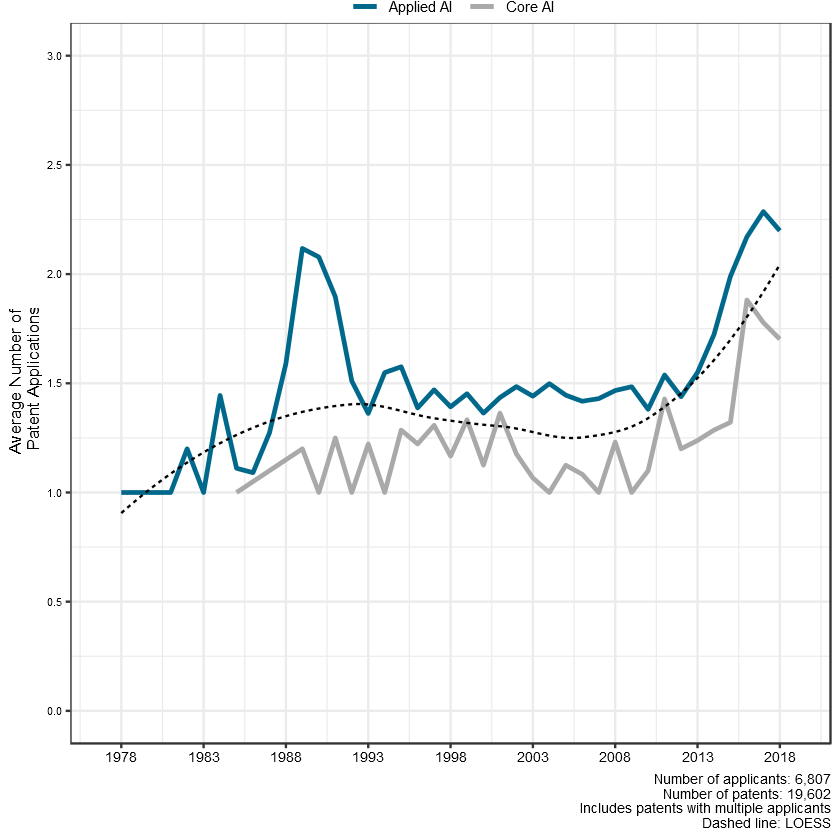

In [31]:
Avg_Application_Trend <- ggplot(Avg_Application, aes(x = Year, y = Average_Patent)) + 
      labs(caption="Number of applicants: 6,807\nNumber of patents: 19,602\nIncludes patents with multiple applicants\nDashed line: LOESS") +
      geom_line(aes(color="Core_AI"), Avg_Application%>%filter(GPT_Scope=="Core_AI"), size=1) +
      geom_line(aes(color="Applied_AI"),Avg_Application %>%filter(GPT_Scope=="Applied_AI"), size=1) +
      stat_smooth(method = "loess", formula = y ~ x, se = FALSE, alpha=0.3, color="black", linetype="dashed", size=0.5) + 
      scale_color_manual(name = "GPT Scope", 
                         values = c("Core_AI" = "darkgrey", "Applied_AI" = "deepskyblue4"),
                         labels=c("Applied AI", "Core AI")) +
      scale_x_continuous(name=NULL, breaks=seq(1978,2018,5), limits=c(1977,2019)) +
      scale_y_continuous(name="Average Number of\n Patent Applications", breaks=seq(0,3,0.5), limits=c(0,3)) +
      theme_bw()+
      theme(legend.position = "top",legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-10,-10,-10,-10),legend.key = element_blank()) +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=6, color="black")) +
      theme(axis.title.y=element_text(size=10))+
      scale_linetype_manual(labels=c("Applied AI", "Core AI"),
                            values = c("Applied AI"=2, "Core AI"=2))
Avg_Application_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Avg_Application_Trend,
       filename="Avg_Application_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_I",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 2.3) New Applicants per Year

Identify for each unique Applicant the 1st patent application

In [32]:
setorder(Industrial_Patent_Dataset,Year)
New_Applicant <- Industrial_Patent_Dataset[, .SD[1], by = APPLICANT_MATCH_NAME]

#Consistency Check should match the number of unique applicants
nrow(New_Applicant)

head(New_Applicant)

[1] 6807

APPLICANT_MATCH_NAME,Patent_number,Application_Date,Clean_name,PDL_ORIGINAL_NAME,PDL_MATCH_NAME,METHOD,Person_ctry_code,COUNTRY,Applicant_Type,...,Publishing,Robotics,Search Methods,Security,Speech Processing,Telecommunications,Transportation,Field_Applications,Functional_Applications,Techniques
SYSTRAN INSTITUT GES FUR FORSCHUNG & ENTWICKLUNG MASCHINELLER SPRACHUBERSETZUNGSSYSTEME,EP0012777,1978-12-30,SYSTRAN INSTITUT GES FUR FORSCHUNG & ENTWICKLUNG MASCHINELLER SPRACHUBERSETZUNGSSYSTEME MBH,NA,NA,NA,GERMANY,NA,Enterprise,...,0,0,0,0,0,0,1,1,1,1
IBM,EP0039393,1981-03-06,IBM CORP,IBM,IBM,Direct_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,0,0,0,1,1,1
STEULER INDUSTRIEWERKE,EP0059929,1982-03-03,STEULER INDUSTRIEWERKE GMBH,NA,NA,NA,GERMANY,NA,Enterprise,...,0,0,0,1,0,0,0,1,0,0
UBE IND,EP0060671,1982-03-09,UBE IND LTD,"UBE INDUSTRIES, LTD.",UBE INDUSTRIES,Fuzzy_Match,JAPAN,JAPAN,Enterprise,...,0,0,0,0,0,0,0,1,0,0
NCR,EP0096712,1982-12-07,NCR CORP,NCR CORPORATION,NCR,Direct_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,1,0,0,1,1,1
EASTMAN KODAK,EP0097689,1982-12-01,EASTMAN KODAK CO,EASTMAN KODAK,EASTMAN KODAK,Direct_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,0,0,0,1,0,1


Group per year and distinguish between Applied and Core AI

In [33]:
New_Applicant <- New_Applicant[,.N, by=c("Year","GPT_Scope")]
colnames(New_Applicant)[3] <- "New_Applicant"

head(New_Applicant)

Year,GPT_Scope,New_Applicant
1978,Applied_AI,1
1981,Applied_AI,1
1982,Applied_AI,5
1983,Applied_AI,2
1984,Applied_AI,9
1985,Applied_AI,6


In [34]:
mean(New_Applicant[Year<=1988 ,New_Applicant])
mean(New_Applicant[Year>1988 & Year<=1998,New_Applicant])
mean(New_Applicant[Year>1998 & Year<=2012,New_Applicant])
New_Applicant[Year==2018,]

[1] 6.1

[1] 33.2

[1] 103.5

Year,GPT_Scope,New_Applicant
2018,Applied_AI,854
2018,Core_AI,43


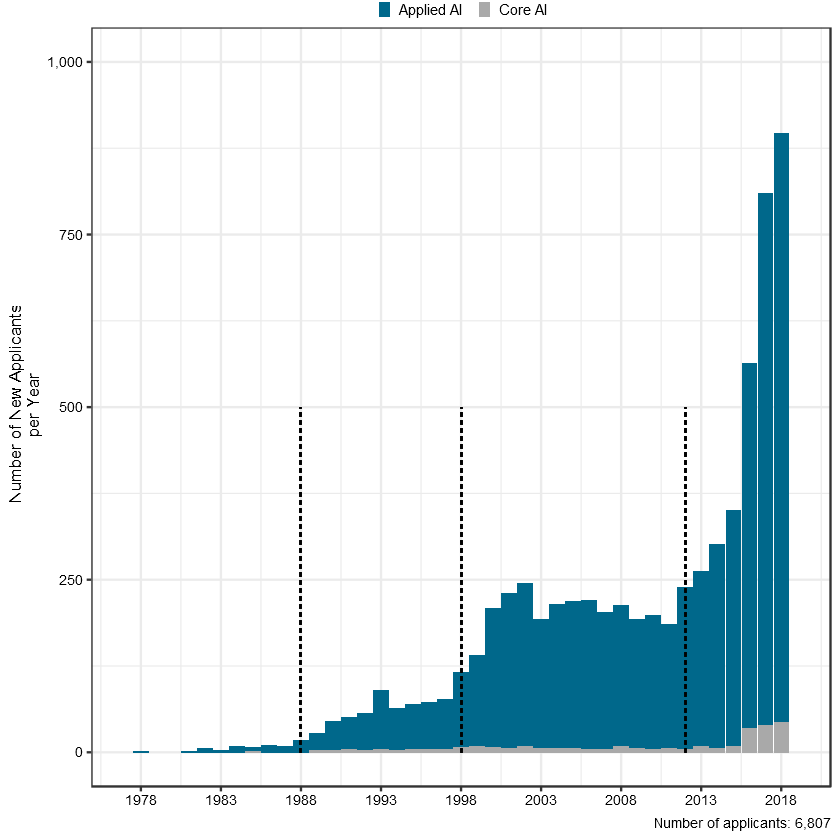

In [35]:
New_Applicants_per_Year<- ggplot(New_Applicant, aes(x=Year, y=New_Applicant, fill=GPT_Scope)) +
      labs(caption="Number of applicants: 6,807") +
      geom_bar(stat="identity") +
      geom_segment(aes(x=1988, xend=1988, y=0, yend=500), color = "black", size=0.25, linetype="dashed") +
      geom_segment(aes(x=1998, xend=1998, y=0, yend=500), color = "black", size=0.25, linetype="dashed") +
      geom_segment(aes(x=2012, xend=2012, y=0, yend=500), color = "black", size=0.25, linetype="dashed") +
      theme_bw() +
      theme(legend.position = "top",legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-5,-5,-5,-5),legend.key.size=unit("0.25","cm")) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) +
      theme(axis.title.y=element_text(size=10)) + 
      scale_fill_manual(values=c("deepskyblue4", "darkgrey"), name = "GPT Scope", labels = c("Applied AI", "Core AI")) +
      scale_x_continuous(name=NULL, breaks=seq(1978,2018,5), limits = c(1977,2019)) +
      scale_y_continuous(name="Number of New Applicants\n per Year", breaks=seq(0,1000,250), limits=c(0,1000),
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE))
New_Applicants_per_Year

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=New_Applicants_per_Year,
       filename="New_Applicants_per_Year.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_I",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 2.4) Share of New Applicants per Year

Merge 'New_Applicant' table with 'ByDate_Applicant' table to calculate share of applicants that are new per year

In [36]:
setkey(New_Applicant, Year, GPT_Scope)
setkey(ByDate_Applicant, Year, GPT_Scope)

Share_New_Applicants <- ByDate_Applicant[New_Applicant]

head(Share_New_Applicants)

Year,GPT_Scope,Number_Applicants,New_Applicant
1978,Applied_AI,1,1
1981,Applied_AI,1,1
1982,Applied_AI,5,5
1983,Applied_AI,3,2
1984,Applied_AI,9,9
1985,Applied_AI,9,6


Calculate Share of New Applicants

In [37]:
Share_New_Applicants <- Share_New_Applicants[, Share_New := New_Applicant/Number_Applicants]

head(Share_New_Applicants)

Year,GPT_Scope,Number_Applicants,New_Applicant,Share_New
1978,Applied_AI,1,1,1.0000000
1981,Applied_AI,1,1,1.0000000
1982,Applied_AI,5,5,1.0000000
1983,Applied_AI,3,2,0.6666667
1984,Applied_AI,9,9,1.0000000
1985,Applied_AI,9,6,0.6666667


In [38]:
summary(Share_New_Applicants[GPT_Scope=="Applied_AI",Share_New])
summary(Share_New_Applicants[GPT_Scope=="Core_AI",Share_New])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5560  0.6042  0.6239  0.6852  0.7230  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2000  0.3452  0.4135  0.4451  0.5000  1.0000 

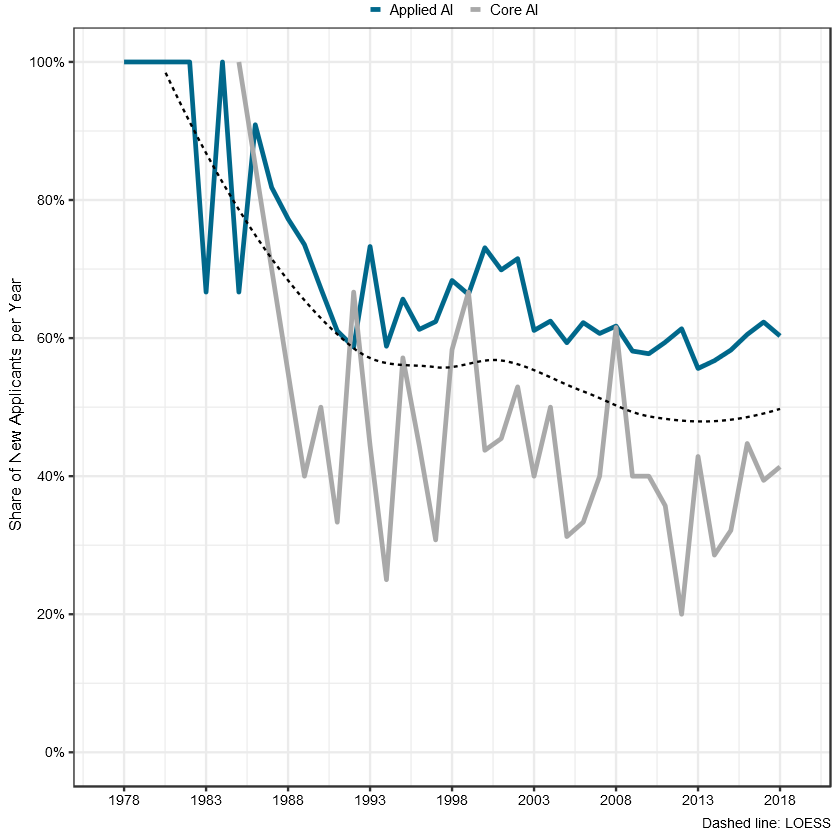

In [39]:
Share_New_Applicants_Chart<- ggplot(Share_New_Applicants, aes(x=Year, y=Share_New, color=GPT_Scope)) +
      labs(caption="Dashed line: LOESS") +
      geom_line(size=1) +
      stat_smooth(method = "loess", formula = y ~ x, se = FALSE, alpha=0.3, color="black", linetype="dashed", size=0.5) + 
      theme_bw() +
      theme(legend.position = "top",legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-5,-5,-5,-5),legend.key.size=unit("0.25","cm")) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) +
      theme(axis.title.y=element_text(size=10)) + 
      scale_color_manual(values=c("deepskyblue4", "darkgrey"), name = "GPT Scope", labels = c("Applied AI", "Core AI")) +
      scale_x_continuous(name=NULL, breaks=seq(1978,2018,5), limits = c(1977,2019)) +
      scale_y_continuous(name="Share of New Applicants per Year",
                         labels = percent_format(), limits=c(0,1), breaks=seq(0,1,0.2))
Share_New_Applicants_Chart

Export graph for Word Document 

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine.
ggsave(plot=Share_New_Applicants_Chart,
       filename="Share_New_Applicants_Chart.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_I",
       scale=1,
       width=5,
       height=(5*0.75),
       units=c("in"),
       dpi=300)

## 2.5) First Application Rate

Combined GPT_ByYear and Fisrt_Application already created

In [40]:
setkey(New_Applicant, Year, GPT_Scope)
setkey(GPT_ByYear, Year, GPT_Scope)
First_Application_Rate <- GPT_ByYear[New_Applicant]

head(First_Application_Rate)

Year,GPT_Scope,Number_Patents,New_Applicant
1978,Applied_AI,1,1
1981,Applied_AI,1,1
1982,Applied_AI,6,5
1983,Applied_AI,3,2
1984,Applied_AI,10,9
1985,Applied_AI,10,6


Calculate the share of patent applicatiosn that represent the 1st application of the corresponding applicant

In [41]:
First_Application_Rate <- First_Application_Rate[, First_Patent_Rate := New_Applicant/Number_Patents]
head(First_Application_Rate)

Year,GPT_Scope,Number_Patents,New_Applicant,First_Patent_Rate
1978,Applied_AI,1,1,1.0000000
1981,Applied_AI,1,1,1.0000000
1982,Applied_AI,6,5,0.8333333
1983,Applied_AI,3,2,0.6666667
1984,Applied_AI,10,9,0.9000000
1985,Applied_AI,10,6,0.6000000


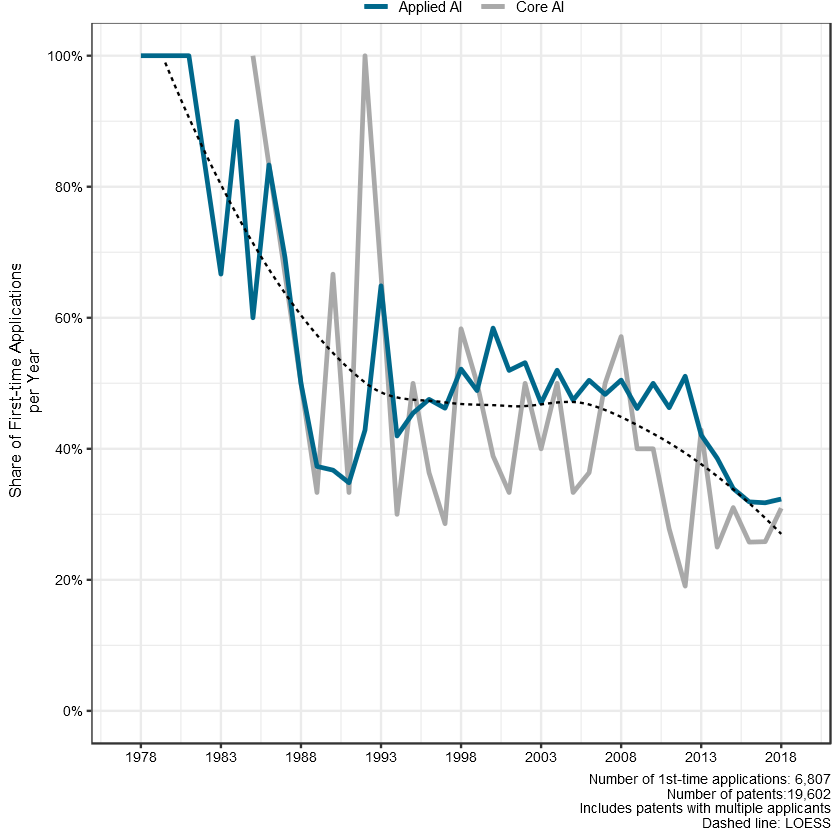

In [42]:
First_Application_Trend <- ggplot(First_Application_Rate, aes(x = Year, y = First_Patent_Rate)) + 
      labs(caption="Number of 1st-time applications: 6,807\nNumber of patents:19,602\nIncludes patents with multiple applicants\nDashed line: LOESS") +
      geom_line(aes(color="Core AI"), First_Application_Rate %>% filter(GPT_Scope=="Core_AI"), size=1) +
      geom_line(aes(color="Applied AI"), First_Application_Rate %>% filter(GPT_Scope=="Applied_AI"), size=1) +
      stat_smooth(method = "loess", formula = y ~ x, se = FALSE, alpha=0.4, color="black", linetype="dashed", size=0.5) + 
      scale_color_manual(name = "GPT Scope", 
                         values = c("Core AI" = "darkgrey", "Applied AI" = "deepskyblue4")) +
      scale_x_continuous(name=NULL, breaks=seq(1978,2018,5), limits=c(1977,2019)) +
      scale_y_continuous(name="Share of First-time Applications\n per Year",
                         labels = percent_format(), limits=c(0,1), breaks=seq(0,1,0.2))+
      theme_bw() +
      theme(legend.position = "top",legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-10,-10,-10,-10))  +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) + 
      theme(axis.title.y=element_text(size=10))
First_Application_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=First_Application_Trend,
       filename="First_Application_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_I",
       scale=1,
       width=5,
       height=(5*0.75),
       units=c("in"),
       dpi=300)

## 2.6) Distribution of Applicants by Number of Patent Applications

Count nuber of applications by unique applicant

In [43]:
Patenting_Distribution <- Industrial_Patent_Dataset[, .N, by=c("APPLICANT_MATCH_NAME")]
colnames(Patenting_Distribution)[2] <- "Number_Patents"

#Consistency Check
nrow(Patenting_Distribution)

head(Patenting_Distribution)

[1] 6807

APPLICANT_MATCH_NAME,Number_Patents
SYSTRAN INSTITUT GES FUR FORSCHUNG & ENTWICKLUNG MASCHINELLER SPRACHUBERSETZUNGSSYSTEME,1
IBM,275
STEULER INDUSTRIEWERKE,1
UBE IND,1
NCR,6
EASTMAN KODAK,35


In [44]:
summary(Patenting_Distribution$Number_Patents)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    2.88    2.00  512.00 

Group applicants by number of applications

In [45]:
Patenting_Distribution <- Patenting_Distribution[, .N, by=c("Number_Patents")]
colnames(Patenting_Distribution)[2] <- "Number_Applicants"
setorder(Patenting_Distribution,Number_Patents)
head(Patenting_Distribution)
tail(Patenting_Distribution)

Number_Patents,Number_Applicants
1,4747
2,913
3,355
4,187
5,132
6,78


Number_Patents,Number_Applicants
252,1
255,1
275,1
280,1
391,1
512,1


Add column calculating total number of patents by cohort

In [46]:
Patenting_Distribution <- Patenting_Distribution[, Total_Patents_Cohort:= Number_Patents*Number_Applicants]

#Consistency Check
sum(Patenting_Distribution$Number_Applicants)
sum(Patenting_Distribution$Total_Patents)
sum(Patenting_Distribution$Total_Patents_Cohort)

head(Patenting_Distribution)
tail(Patenting_Distribution)

[1] 6807

[1] 19602

[1] 19602

Number_Patents,Number_Applicants,Total_Patents_Cohort
1,4747,4747
2,913,1826
3,355,1065
4,187,748
5,132,660
6,78,468


Number_Patents,Number_Applicants,Total_Patents_Cohort
252,1,252
255,1,255
275,1,275
280,1,280
391,1,391
512,1,512


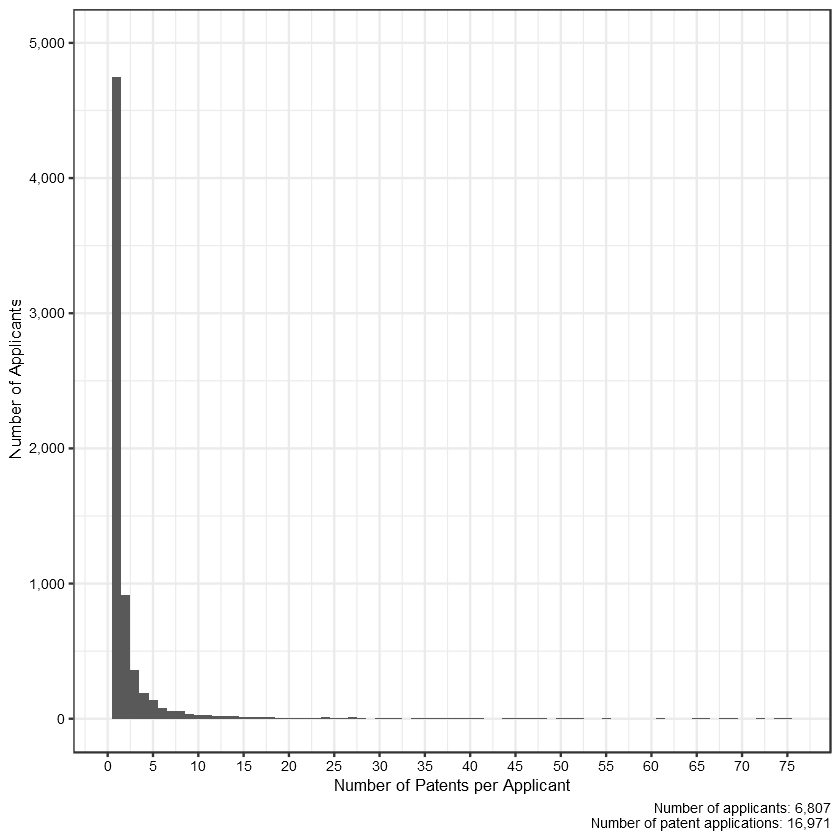

In [47]:
Patent_Distr_Chart <- ggplot(Patenting_Distribution, aes(x=Number_Patents, y=Number_Applicants)) +
      labs(caption="Number of applicants: 6,807\nNumber of patent applications: 16,971") +
      geom_bar(stat="identity") + 
      scale_x_continuous(name="Number of Patents per Applicant",breaks=seq(0,75,5), limits = c(0,76)) +
      scale_y_continuous(name="Number of Applicants", breaks=seq(0,5000,1000), limits=c(0,5000),
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE)) +
      theme_bw() +
      theme(plot.caption=element_text(family="sans",size=8)) +
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) + 
      theme(axis.title.x=element_text(size=10)) +
      theme(axis.title.y=element_text(size=10))
Patent_Distr_Chart

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Patent_Distr_Chart,
       filename="Patent_Distr_Chart.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_I",
       scale=1,
       width=3.54,
       height=(5*0.75),
       units=c("in"),
       dpi=300)

## 2.7) Cumulative Share of Patent Applications by Number of Applications Cohorts

Statistics:

1) Share of patent applications by Applicants with 12 or less applications

2) Share of patent applications by Applicants with 75 or more applications

(1) 12 or less

In [48]:
#Number of Applicants
Small_Applicants <- sum(Patenting_Distribution[Number_Patents<=12,Number_Applicants])
Small_Applicants

#Share of patent applicants
round(Small_Applicants/sum(Patenting_Distribution[,Number_Applicants]),3)

#Number Applications
Small_Applications <- sum(Patenting_Distribution[Number_Patents<=12,Total_Patents_Cohort])
Small_Applications

#Share of patent applications
round(Small_Applications/sum(Patenting_Distribution[,Total_Patents_Cohort]),3)

[1] 6624

[1] 0.973

[1] 11397

[1] 0.581

(2) 75 or more

In [49]:
#Number of Applicants
Large_Applicants <- sum(Patenting_Distribution[Number_Patents>=75,Number_Applicants])
Large_Applicants

#Share of patent applicants
round(Large_Applicants/sum(Patenting_Distribution[,Number_Applicants]),3)

#Number Applications
Large_Applications <- sum(Patenting_Distribution[Number_Patents>=75,Total_Patents_Cohort])
Large_Applications

#Share of patent applications
round(Large_Applications/sum(Patenting_Distribution[,Total_Patents_Cohort]),3)

[1] 22

[1] 0.003

[1] 4017

[1] 0.205

In [50]:
head(Patenting_Distribution)

Number_Patents,Number_Applicants,Total_Patents_Cohort
1,4747,4747
2,913,1826
3,355,1065
4,187,748
5,132,660
6,78,468


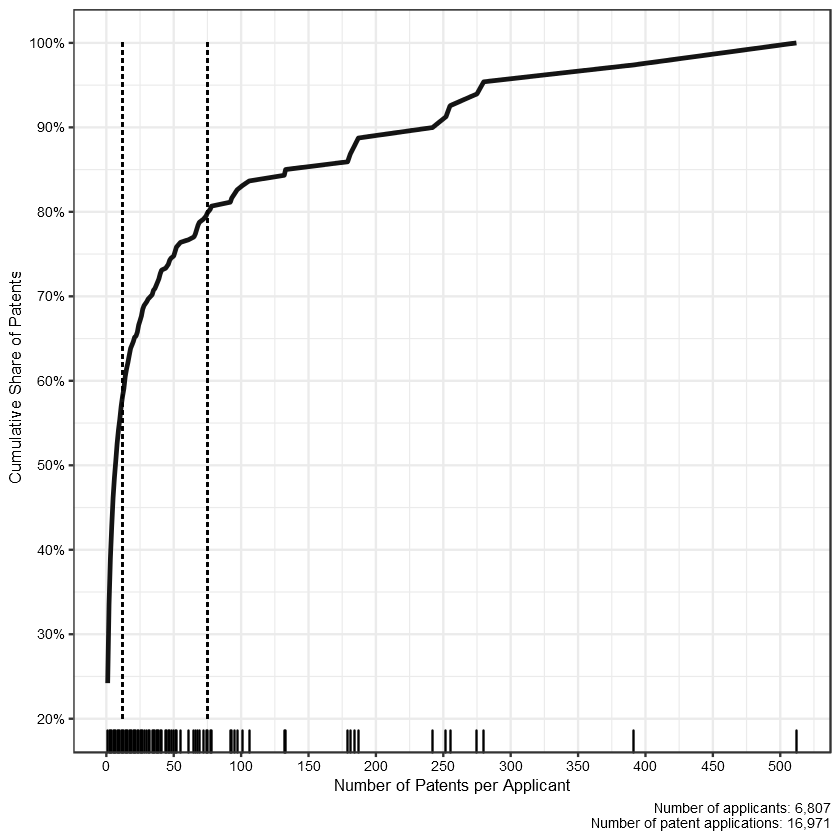

In [51]:
Distribution_Curve <- ggplot(Patenting_Distribution, aes(x=Number_Patents,
                                                             y=cumsum(Total_Patents_Cohort)/sum(Total_Patents_Cohort))) +
      labs(caption="Number of applicants: 6,807\n Number of patent applications: 16,971") +
      geom_line(colour="gray8", size=1) + 
      geom_rug(sides="b") + 
      geom_segment(aes(x = 12, y = 0.2, xend = 12, yend = 1), size=0.25, linetype= "dashed") + 
      geom_segment(aes(x = 75, y = 0.2, xend = 75, yend = 1), size=0.25,  linetype= "dashed") + 
      scale_x_continuous(name="Number of Patents per Applicant", breaks = seq(0,500,50))+
      scale_y_continuous(name="Cumulative Share of Patents",
                         breaks=seq(0,1,0.1),labels = percent_format(accuracy = 5L)) +
      theme_bw() +
      theme(plot.caption=element_text(family="sans",size=8)) +
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) + 
      theme(axis.title.x=element_text(size=10)) +
      theme(axis.title.y=element_text(size=10))
Distribution_Curve

In [ ]:
ggsave(plot=Distribution_Curve,
       filename="Distribution_Curve.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_I",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 2.8) Top Patent Applicants

In [52]:
Top_Owners <- Industrial_Patent_Dataset[, .N, by=c("APPLICANT_MATCH_NAME")]
colnames(Top_Owners)[2] <-
"Number_Patents"
head(Top_Owners)

APPLICANT_MATCH_NAME,Number_Patents
SYSTRAN INSTITUT GES FUR FORSCHUNG & ENTWICKLUNG MASCHINELLER SPRACHUBERSETZUNGSSYSTEME,1
IBM,275
STEULER INDUSTRIEWERKE,1
UBE IND,1
NCR,6
EASTMAN KODAK,35


In [53]:
Top_Owners <- Top_Owners[Number_Patents>=75,]
setorder(Top_Owners,-Number_Patents )
Top_Owners

APPLICANT_MATCH_NAME,Number_Patents
GOOGLE,512
MICROSOFT TECH LICENSING,391
MICROSOFT,280
IBM,275
INTEL,255
SIEMENS,252
SAMSUNG ELECT,242
QUALCOMM,187
KON PHILIPS,184
KON PHILIPS ELECT,181


In [54]:
Top_Owners$APPLICANT_MATCH_NAME

[1] "GOOGLE"                                     
 [2] "MICROSOFT TECH LICENSING"                   
 [3] "MICROSOFT"                                  
 [4] "IBM"                                        
 [5] "INTEL"                                      
 [6] "SIEMENS"                                    
 [7] "SAMSUNG ELECT"                              
 [8] "QUALCOMM"                                   
 [9] "KON PHILIPS"                                
[10] "KON PHILIPS ELECT"                          
[11] "HUAWEI"                                     
[12] "SONY"                                       
[13] "NOKIA"                                      
[14] "NEC"                                        
[15] "FUJITSU"                                    
[16] "GENERAL ELECT"                              
[17] "THE REGENTS OF THE UNIVERSITY OF CALIFORNIA"
[18] "IBM UK"                                     
[19] "MITSUBISHI ELECT"                           
[20] "TENCENT TECH SHENZHEN"                      
[21] "HEWLETT PACKARD DEV CO"                     
[22] "TELEFON AB LM ERICSSON PUBL"